In [6]:
import sys
import time
import bibtexparser
import itertools
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
import bibtexparser
bibtex_file = open('gap-publishednicer.bib.txt', encoding='utf-8')
bib_data = bibtexparser.load(bibtex_file)

In [106]:
bib = bib_data.entries

In [107]:
bib_df = pd.DataFrame.from_dict(bib)
review_df = pd.read_csv('no_citation_text.csv', dtype='str')
corpus_df = pd.read_csv('gap_citations_corpus.csv', dtype='str')

# Larger dataset from Bibliography

In [108]:
bib_df.drop(bib_df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]], axis = 1, inplace = True)

In [109]:
bib_df.columns

Index(['year', 'journal', 'author', 'ENTRYTYPE', 'ID'], dtype='object')

In [111]:
bib_df = bib_df[['ID', 'author', 'journal', 'year', 'ENTRYTYPE']]

Then we change the `ID` coulmn name to `MR` so we cane later merge this dataframe with the other one.

In [123]:
bib_df.columns = ['MR', 'author', 'journal', 'year', 'ENTRYTYPE']

In [124]:
bib_df.head(7)

,MR,author,journal,year,ENTRYTYPE
0,MR4056124,"Abas, M. and Vetrík, T.",Theoret. Comput. Sci.,2020,article
1,MR3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A ...,2019,article
2,Abdeljaouad99,"Abdeljaouad, I.",RAIRO-INF THEOR APPL,1999,article
3,MR3354065,"Abdolghafourian, A. and Iranmanesh, M. A.",Comm. Algebra,2015,article
4,MR3646312,"Abdolghafourian, A. and Iranmanesh, M. A. and ...",J. Pure Appl. Algebra,2017,article
5,MR1864795,"Abdollahi, A.",Houston J. Math.,2001,article
6,MR2371966,"Abdollahi, A.",J. Algebra,2007,article


In [114]:
bib_df.sort_values('year', ascending=False)

,ID,author,journal,year,ENTRYTYPE
3165,MR3973299,"Then, H.",NaN,[2019] \copyright 2019,incollection
1546,MR3898507,"Greer, M.",NaN,[2019] \copyright 2019,incollection
3133,MR3898514,"Stuhl, I. and Vojtěchovský, P.",NaN,[2019] \copyright 2019,incollection
3147,MR3782458,"Swinarski, D.",NaN,[2018] \copyright 2018,incollection
1981,MR4167659,"Kaushik, R. and Yadav, M. K.",J. Algebra,2021,article
...,...,...,...,...,...
3274,Wegner89,"Wegner, A.",NaN,1989,mastersthesis
2689,Niemeyer88,"Niemeyer, A.",NaN,1988,mastersthesis
2673,Nickel88,"Nickel, W.",NaN,1988,mastersthesis
3018,Schonert88,"Schönert, M.",NaN,1987,mastersthesis


In [125]:
bib_df.iloc[2]

MR                  Abdeljaouad99
author            Abdeljaouad, I.
journal      RAIRO-INF THEOR APPL
year                         1999
ENTRYTYPE                 article
Name: 2, dtype: object

In [104]:
bib_df.info(show_counts  = True)

<class 'pandas.core.frame.DataFrame'>
Index: 3367 entries, MR4056124 to MR3089327
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       3367 non-null   object
 1   journal    3047 non-null   object
 2   author     3367 non-null   object
 3   ENTRYTYPE  3367 non-null   object
dtypes: object(4)
memory usage: 130.8+ KB


In [122]:
bib_df.describe()

,ID,author,journal,year,ENTRYTYPE
count,3367,3367,3047,3367,3367
unique,3366,2511,384,43,10
top,MR3656296,"Sambale, B.",J. Algebra,2017,article
freq,2,18,387,188,2976


In [92]:
bib_df['year'].describe()

count     3367
unique      43
top       2017
freq       188
Name: year, dtype: object

<AxesSubplot:>

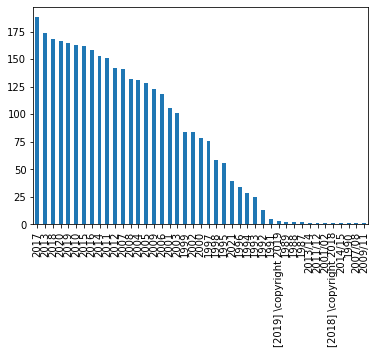

In [85]:
bib_df['year'].value_counts().plot(kind="bar")

In [83]:
bib_df['ENTRYTYPE'].describe()

count        3367
unique         10
top       article
freq         2976
Name: ENTRYTYPE, dtype: object

In [120]:
bib_df['ENTRYTYPE'].value_counts()

article          2976
incollection      204
inproceedings      54
phdthesis          47
mastersthesis      46
book               31
misc                5
techreport          2
inbook              1
manual              1
Name: ENTRYTYPE, dtype: int64

##### The most frequent type of work citing GAP is article.

<AxesSubplot:>

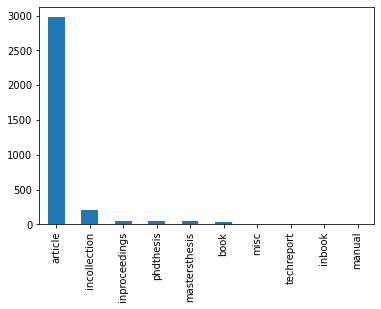

In [84]:
bib_df['ENTRYTYPE'].value_counts().plot(kind="bar") # base from leccture 8 CS2006

#  Corpus and Review

To do
+ check Citations strings lenghts to isolate too short ones
+ version
+ website
+ remaining HTML characters

In [20]:
corpus_df

,MR,Citation
0,MR4056124,"GAP – Groups, algorithms, programming - a syst..."
1,MR3942387,"Delgado, M., García-Sánchez, P.A., Morais, J.:..."
2,MR3942387,"The GAP Group: GAP—groups, algorithms, and pro..."
3,MR3354065,"The GAP – Groups, Algorithms and Programming. ..."
4,MR3646312,"The $\ssf{GAP}$ Group, $\ssf{GAP}$–Groups, Alg..."
...,...,...
3537,MR3988630,"M. Delgado, P. A. García-Sánchez and J. Morais..."
3538,MR1801202,"L.H. Soicher, GRAPE: a system for computing wi..."
3539,MR2558870,"L. Bartholdi, Functionally recursive groups, h..."
3540,MR2824780,"X. Sun, C. Liu, D. Li and J. Gao, On duality g..."


In [49]:
print(corpus_df[corpus_df['MR'].str.contains("MR3942387")])

          MR                                           Citation
1  MR3942387  Delgado, M., García-Sánchez, P.A., Morais, J.:...
2  MR3942387  The GAP Group: GAP—groups, algorithms, and pro...


In [50]:
exa = corpus_df[corpus_df['MR'].str.contains("MR3942387")]

In [57]:
exa.iloc[0]['Citation']

'Delgado, M., García-Sánchez, P.A., Morais, J.: "Numerical Sgps", A GAP package for numerical semi-groups. https://gap-packages.github.io/numericalsgps. Accessed 19 Aug 2017 \nMR3493240'

In [58]:
exa.iloc[1]['Citation']

'The GAP Group: GAP—groups, algorithms, and programming, version 4.7.5 (2014). http://www.gap-system.org. Accessed 19 Aug 2017'

In [59]:
exa1 = corpus_df[corpus_df['MR'].str.contains("MR2822510")]

In [60]:
exa1

,MR,Citation
3523,MR2822510,http://www.gap-system.org.


df = pd.DataFrame(lis_dic)
df = df[df.ID.isin(targets)]

df_filtered = df[df.mrnumber.isin(mrs)]

# Merging the two dataframes with the equivalent of SQL `join`

In [121]:
merged_df = pd.merge(bib_df,corpus_df,on='ID',how='outer',indicator=True)

KeyError: 'ID'